In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

print(f'NumPy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Sklearn version: {sklearn.__version__}')
print(f'Seaborn version: {sklearn.__version__}')

NumPy version: 1.19.2
Pandas version: 1.1.3
Sklearn version: 0.23.2
Seaborn version: 0.23.2


In [2]:
!pip install plotly
!pip install textblob
!pip install cufflinks
!pip install pyspellchecker

In [3]:
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
import string
from plotly.offline import iplot
from textblob import TextBlob  
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from typing import List, Dict

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## SMS Spam Collection Data Set

### Descriere

SMS Spam Collection Data Set contine 5574 de mesaje impartite in doua categorii, `ham`(mesaje legitime) si `spam`, colectate in scopul analizarii mesajelor de tip spam.

Aceste date(mesaje) au fost colectate din surse gratuite de pe internet:

- O colecție de 425 mesaje SMS spam a fost extrasă manual de pe site-ul web Grumbletext. Acesta este un forum din Marea Britanie în care utilizatorii de telefoane mobile fac reclamații publice cu privire la mesajele SMS spam, majoritatea fără a raporta chiar mesajul spam primit. Identificarea textului mesajelor spam în revendicări este o sarcină foarte grea și care necesită mult timp și implică scanarea atentă a sutelor de pagini web. Site-ul web Grumbletext este: [Web Link](http://www.grumbletext.co.uk).
- Un subset de 3.375 de mesaje SMS selectate aleatoriu din corpul NUS SMS (NSC), care este un set de date de aproximativ 10.000 de mesaje legitime colectate pentru cercetare la Departamentul de Informatică de la Universitatea Națională din Singapore. Mesajele provin în mare parte din Singapore și în special din studenții care frecventează universitatea. Aceste mesaje au fost colectate de la voluntari cărora li s-a adus la cunoștință că contribuțiile lor vor fi făcute publice. Corpusul SMS NUS este disponibil la: [Link Web](http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/).
- O listă de 450 de mesaje SMS cu șuncă colectate din teza de doctorat a lui Caroline Tag disponibilă la [Web Link](http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf).
- A fost încorporat si SMS Spam Corpus v.0.1 Big. Are 1.002 mesaje SMS și 322 mesaje spam și este public disponibil la: [Web Link](http://www.esp.uem.es/jmgomez/smsspamcorpus/).

In [5]:
data: pd.DataFrame = pd.read_csv("data/SMSSpamCollection", delimiter="\t", header=None)
data: pd.DataFrame = data.rename(columns= {0: 'Clasa', 1:'Mesaj'})
data.head()

,Clasa,Mesaj
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Standardizarea mesajelor:

In [6]:
data['Mesaj'] = data['Mesaj'].str.lower()
data['Mesaj']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Mesaj, Length: 5572, dtype: object

In [7]:
PUNCT_TO_REMOVE: str = string.punctuation
def remove_punctuation(text: str) -> str:
    """
    Custom function to remove the punctuation.
    :param text: message that needs removal of punctuation
    :returns: a string without punctuation
    
    """
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["Mesaj"] = data["Mesaj"].apply(lambda text: remove_punctuation(text))
data

,Clasa,Mesaj
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bocir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
STOPWORDS: set = set(stopwords.words('english'))
def remove_stopwords(text: str) -> str:
    """
    Custom function to remove the stopwords
    :param text: message that needs removal of stopwords
    :returns: the message(a string) without stopwords
    
    """
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["Mesaj"] = data["Mesaj"].apply(lambda text: remove_stopwords(text))
data

,Clasa,Mesaj
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u £750 pound prize ...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [10]:
from collections import Counter
cnt = Counter()
for text in data["Mesaj"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('u', 1132),
 ('call', 578),
 ('2', 482),
 ('im', 464),
 ('ur', 390),
 ('get', 386),
 ('4', 293),
 ('dont', 287),
 ('go', 281),
 ('ok', 278)]

In [26]:
FREQWORDS: set = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text: str) -> str:
    """
    Custom function to remove the frequent words.
    :param text: text that needs removal of frequent words
    :returns: a string(message) without frequent words
    """
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["Mesaj"] = data["Mesaj"].apply(lambda text: remove_freqwords(text))
data

,Clasa,Mesaj
0,ham,jurong point crazy available bugis n great wor...
1,ham,lar joking wif you oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,you dun say early hor you c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried contact you you £750 pound priz...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [27]:
n_rare_words: int = 10
RAREWORDS: set = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text: str) -> str:
    """
    Custom function to remove the rare words.
    :param text: text that needs removal of rare words
    :returns: a string(message) without rare words
    """
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

data["Mesaj"] = data["Mesaj"].apply(lambda text: remove_rarewords(text))
data

,Clasa,Mesaj
0,ham,jurong point crazy available bugis n great wor...
1,ham,lar joking wif you oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,you dun say early hor you c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried contact you you pound prize cla...
5568,ham,ü b going esplanade fr home
5569,ham,mood
5570,ham,guy acted like id interested buying something ...


In [28]:
chat_words_str: str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [29]:
chat_words_str: str = chat_words_str.lower()
chat_words_map_dict: Dict = {}
chat_words_list: List = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text: str) -> str:
    """
    Custom function to convert abbreviations into normal words.
    :param text: text that needs to be converted
    :returns: a string(converted message)
    """
    new_text: List[str] = []
    for w in text.split():
        if w in chat_words_list:
            new_text.append(chat_words_map_dict[w])
        else:
            new_text.append(w)
    return " ".join(new_text)

chat_words_conversion("one minute brb")

'one minute be right back'

In [30]:
data["Mesaj"] = data["Mesaj"].apply(lambda text: chat_words_conversion(text))
data

,Clasa,Mesaj
0,ham,jurong point crazy available bugis n great wor...
1,ham,lar joking wif you oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,you dun say early hor you c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried contact you you pound prize cla...
5568,ham,ü b going esplanade fr home
5569,ham,mood
5570,ham,guy acted like id interested buying something ...


In [31]:
spell = SpellChecker()
def correct_spellings(text: str) -> str:
    """
    Custom function to convert words spelled wrong into correct words.
    :param text: text that needs to be converted
    :returns: a string(converted message)
    """
    corrected_text: List[str] = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "speling correctin"
correct_spellings(text)

'spelling correcting'

In [32]:
data["Mesaj"] = data["Mesaj"].apply(lambda text: correct_spellings(text))
data

,Clasa,Mesaj
0,ham,jurons point crazy available bugs i great worl...
1,ham,lar joking wif you oni
2,spam,free entry wily comp win fa cup final tits jus...
3,ham,you dun say early hor you i already say
4,ham,nah think goes us lives around though
...,...,...
5567,spam,and time tried contact you you pound prize cla...
5568,ham,i i going esplanade for home
5569,ham,mood
5570,ham,guy acted like id interested buying something ...


### Analiza exploratorie

Exemplu de mesaj spam:

In [33]:
data[data['Clasa'] == 'spam'].iloc[0]['Mesaj']

'free entry wily comp win fa cup final tits just may 2005 text fa 87121 receive entry questions text rates apply 08452810075over18s'

Exemplu de mesaj legitim:

In [34]:
data[data['Clasa'] == 'ham'].iloc[0]['Mesaj']

'jurons point crazy available bugs i great world la e buffet cine got amore wat'

Creare de etichete numerice pentru clasificare:

In [35]:
label: Dict[int,int] = {'ham': 0, 'spam': 1}
data['IsSpam'] = data['Clasa'].map(label)
data.head()

,Clasa,Mesaj,IsSpam
0,ham,jurons point crazy available bugs i great worl...,0
1,ham,lar joking wif you oni,0
2,spam,free entry wily comp win fa cup final tits jus...,1
3,ham,you dun say early hor you i already say,0
4,ham,nah think goes us lives around though,0


In [38]:
data['Polaritate'] = data['Mesaj'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Nr_litere'] = data['Mesaj'].apply(lambda x: len(x))
data['Nr_cuvinte'] = data['Mesaj'].apply(lambda x: len(x.split()))

def get_avg_word_len(message: str) -> float:
    """
    Custom function to get the average lenght of words in a message.
    :param text: message we want to check
    :returns: a float representing the average lenght of words
    """
    words: List[str] = message.split()
    if len(words) == 0:
        return 0
    word_len: int = 0
    for word in words:
        word_len += len(word)
    return word_len/len(words)

data['Lungime_medie_cuvant'] = data['Mesaj'].apply(lambda x: get_avg_word_len(x))
data

,Clasa,Mesaj,IsSpam,Polaritate,Nr_litere,Nr_cuvinte,Lungime_medie_cuvant
0,ham,jurons point crazy available bugs i great worl...,0,0.200000,78,15,4.266667
1,ham,lar joking wif you oni,0,0.000000,22,5,3.600000
2,spam,free entry wily comp win fa cup final tits jus...,1,0.400000,130,22,4.954545
3,ham,you dun say early hor you i already say,0,0.100000,39,9,3.444444
4,ham,nah think goes us lives around though,0,0.000000,37,7,4.428571
...,...,...,...,...,...,...,...
5567,spam,and time tried contact you you pound prize cla...,1,0.433333,82,14,4.928571
5568,ham,i i going esplanade for home,0,0.000000,28,6,3.833333
5569,ham,mood,0,0.000000,4,1,4.000000
5570,ham,guy acted like id interested buying something ...,0,0.216667,73,13,4.692308


In [39]:
data['Polaritate'].iplot(kind = 'hist', colors = 'red', bins = 30, 
                         xTitle = 'Polarity', yTitle = 'Count',
                         title = 'Sentiment polarity distribution')

In [43]:
ham_polarity:pd.core.frame.DataFrame = data[data['IsSpam'] == 0][['IsSpam', 'Polaritate']]
ham_polarity['Polaritate'].iplot( kind = 'hist', colors = 'red', bins = 30, 
                         xTitle = 'Polarity', yTitle = 'Count',
                         title = 'Sentiment polarity distribution-Legitimate message')

In [44]:
spam_polarity:pd.core.frame.DataFrame = data[data['IsSpam'] == 1][['IsSpam', 'Polaritate']]
spam_polarity['Polaritate'].iplot( kind = 'hist', colors = 'red', bins = 30, 
                         xTitle = 'Polarity', yTitle = 'Count',
                         title = 'Sentiment polarity distribution-Spam message')

Prima histograma si coloana 'Polaritate' analizeaza sentimentul mesajelor din setul de date. Aceasta tehnica este mai utila cand vine vorba de analizarea unor recenzii, insa am considerat ca ar fi interesant sa observam ce se intampla si in acest set de date. Dupa cum putem observa majoritatea mesajelor se concentreaza in zona 0, asadar sunt in mare parte mesaje neutre din punct de vedere sentimental, dar se poate vedea si ca numarul mesajelor pozitive este mult mai mare decat cel al celor negative.

Comparand ultimele doua histograme observam ca fenomenul se resimte si cand impartim mesajele in functie de tipul lor, dar si diferenta dintre numarul de mesaje legitime si spam, pe care o sa il analizam in continuare.

In [45]:
ham_nr_litere:pd.core.frame.DataFrame = data[data['IsSpam'] == 0][['IsSpam', 'Nr_litere']]
ham_nr_cuvinte:pd.core.frame.DataFrame = data[data['IsSpam'] == 0][['IsSpam', 'Nr_cuvinte']]
spam_nr_litere:pd.core.frame.DataFrame = data[data['IsSpam'] == 1][['IsSpam', 'Nr_litere']]
spam_nr_cuvinte:pd.core.frame.DataFrame = data[data['IsSpam'] == 1][['IsSpam', 'Nr_cuvinte']]

In [46]:
ham_nr_litere['Nr_litere'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Caractere', yTitle = 'Count',
                         title = 'Character distribution-Legitimate message')

In [47]:
spam_nr_litere['Nr_litere'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Caractere', yTitle = 'Count',
                         title = 'Character distribution-Spam message')

In [48]:
ham_nr_cuvinte['Nr_cuvinte'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Cuvinte', yTitle = 'Count',
                         title = 'Word distribution-Legitimate message')

In [49]:
spam_nr_cuvinte['Nr_cuvinte'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Cuvinte', yTitle = 'Count',
                         title = 'Word distribution-Spam message')

Date despre mesajele legitime:

In [50]:
data[data['IsSpam'] == 0].describe()

,IsSpam,Polaritate,Nr_litere,Nr_cuvinte,Lungime_medie_cuvant
count,4825.0,4825.000000,4825.000000,4825.000000,4825.000000
mean,0.0,0.071207,44.962487,7.886425,4.834504
std,0.0,0.279223,37.938941,6.330710,1.261834
min,0.0,-1.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,20.000000,4.000000,4.142857
50%,0.0,0.000000,33.000000,6.000000,4.750000
75%,0.0,0.200000,60.000000,10.000000,5.375000
max,0.0,1.000000,500.000000,78.000000,41.000000


Date despre mesajele spam:

In [51]:
data[data['IsSpam'] == 1].describe()

,IsSpam,Polaritate,Nr_litere,Nr_cuvinte,Lungime_medie_cuvant
count,747.0,747.000000,747.000000,747.000000,747.000000
mean,1.0,0.167736,102.730924,15.552878,5.816766
std,0.0,0.258762,24.646316,4.231039,1.089178
min,1.0,-0.800000,12.000000,2.000000,3.611111
25%,1.0,0.000000,94.000000,13.000000,5.125000
50%,1.0,0.136364,107.000000,16.000000,5.666667
75%,1.0,0.377778,120.000000,19.000000,6.333333
max,1.0,1.000000,155.000000,26.000000,14.333333


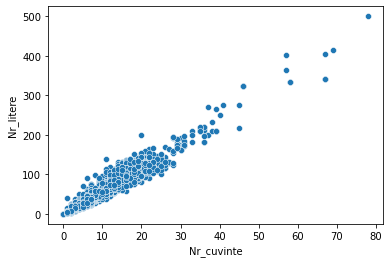

In [52]:
sns.scatterplot(x='Nr_cuvinte', y='Nr_litere', data=data);

Din tot ce s-a prezentat anterior tragem concluzia ca mesajele de tip spam par sa aiba atat mai multe caractere, cat si mai multe cuvinte fata de cele legitime, deci sunt mai lungi. Am observat, de asemenea, si ca numarul de caractere este similar cu numarul de cuvinte, motiv pentru care vom renunta la una dintre coloane.

In [53]:
data = data.drop('Nr_cuvinte', axis = 1).reset_index(drop=True)
data = data.drop('Polaritate', axis = 1).reset_index(drop=True)
data = data.drop('Lungime_medie_cuvant', axis = 1).reset_index(drop=True)
data

,Clasa,Mesaj,IsSpam,Nr_litere
0,ham,jurons point crazy available bugs i great worl...,0,78
1,ham,lar joking wif you oni,0,22
2,spam,free entry wily comp win fa cup final tits jus...,1,130
3,ham,you dun say early hor you i already say,0,39
4,ham,nah think goes us lives around though,0,37
...,...,...,...,...
5567,spam,and time tried contact you you pound prize cla...,1,82
5568,ham,i i going esplanade for home,0,28
5569,ham,mood,0,4
5570,ham,guy acted like id interested buying something ...,0,73


## Sentiment Labelled Sentences Data Set

### Descriere

Setul de date contine propozitii etichetate ca fiind pozitive sau negative. Aceste propozitii au fost extrase din review-urile de pe anumite site-uri precum imb, amazon sau yelp.

Noi am ales setul de recenzii de la amazon, iar acesta contine 500 de review-uri pozitive și 500 de review-uri negative.
Propozitiile prezente in fisier sunt clar adnotate astfel incat sa nu existe posibilitatea de aparitie a unor propozitii neutre.
Formatul fisierului este urmatorul : propozitie \t(tab) scor(1 pentru review pozitiv si 0 pentru negativ)




In [55]:
data2: pd.DataFrame = pd.read_csv("data/amazon_cells_labelled.txt", delimiter="\t", header=None)
data2: pd.DataFrame = data2.rename(columns= {0: 'Mesaj', 1:'Scor'})
data2.head()

,Mesaj,Scor
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Preprocesare

Standardizarea mesajelor:

In [56]:
data2['Mesaj'] = data2['Mesaj'].str.lower()
data2['Mesaj']

0      so there is no way for me to plug it in here i...
1                            good case, excellent value.
2                                 great for the jawbone.
3      tied to charger for conversations lasting more...
4                                      the mic is great.
                             ...                        
995    the screen does get smudged easily because it ...
996    what a piece of junk.. i lose more calls on th...
997                         item does not match picture.
998    the only thing that disappoint me is the infra...
999    you can not answer calls with the unit, never ...
Name: Mesaj, Length: 1000, dtype: object

In [57]:
data2["Mesaj"] = data2["Mesaj"].apply(lambda text: remove_punctuation(text))
data2

,Mesaj,Scor
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1
...,...,...
995,the screen does get smudged easily because it ...,0
996,what a piece of junk i lose more calls on this...,0
997,item does not match picture,0
998,the only thing that disappoint me is the infra...,0


In [58]:
data2["Mesaj"] = data2["Mesaj"].apply(lambda text: remove_stopwords(text))
data2

,Mesaj,Scor
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1
...,...,...
995,screen get smudged easily touches ear face,0
996,piece junk lose calls phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [59]:
from collections import Counter
cnt = Counter()
for text in data2["Mesaj"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('phone', 162),
 ('great', 97),
 ('good', 75),
 ('product', 55),
 ('quality', 49),
 ('headset', 47),
 ('works', 47),
 ('battery', 45),
 ('sound', 41),
 ('use', 41)]

In [60]:
data2["Mesaj"] = data2["Mesaj"].apply(lambda text: remove_freqwords(text))
data2

,Mesaj,Scor
0,way plug us unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1
...,...,...
995,screen smudged easily touches ear face,0
996,piece junk lose calls phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [61]:
data2["Mesaj"] = data2["Mesaj"].apply(lambda text: remove_rarewords(text))
data2

,Mesaj,Scor
0,way plug us unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1
...,...,...
995,screen smudged easily touches ear face,0
996,piece junk lose calls phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [62]:
data2["Mesaj"] = data2["Mesaj"].apply(lambda text: correct_spellings(text))
data2

,Mesaj,Scor
0,way plug us unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1
...,...,...
995,screen smudged easily touches ear face,0
996,piece junk lose calls phone,0
997,item match picture,0
998,thing disappoint infra red port ida,0


### Analiza exploratorie

Exemplu de review pozitiv:

In [63]:
data2[data2['Scor'] == 1].iloc[0]['Mesaj']

'good case excellent value'

Exemplu de review negativ:

In [64]:
data2[data2['Scor'] == 0].iloc[0]['Mesaj']

'way plug us unless converter'

Creare de etichete numerice pentru clasificare:

In [65]:
data2.head()

,Mesaj,Scor
0,way plug us unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1


In [66]:
data2['Polaritate'] = data2['Mesaj'].apply(lambda x: TextBlob(x).sentiment.polarity)
data2['Nr_litere'] = data2['Mesaj'].apply(lambda x: len(x))
data2['Nr_cuvinte'] = data2['Mesaj'].apply(lambda x: len(x.split()))

In [67]:
data2['Lungime_medie_cuvant'] = data2['Mesaj'].apply(lambda x: get_avg_word_len(x))
data2

,Mesaj,Scor,Polaritate,Nr_litere,Nr_cuvinte,Lungime_medie_cuvant
0,way plug us unless converter,0,0.000000,28,5,4.800000
1,good case excellent value,1,0.850000,25,4,5.500000
2,great jawbone,1,0.800000,13,2,6.000000
3,tied charger conversations lasting 45 minutesm...,0,0.000000,59,7,7.571429
4,mic great,1,0.800000,9,2,4.000000
...,...,...,...,...,...,...
995,screen smudged easily touches ear face,0,0.433333,38,6,5.500000
996,piece junk lose calls phone,0,0.000000,27,5,4.600000
997,item match picture,0,0.000000,18,3,5.333333
998,thing disappoint infra red port ida,0,0.000000,35,6,5.000000


In [68]:
data2['Polaritate'].iplot(kind = 'hist', colors = 'blue', bins = 30, 
                         xTitle = 'Polarity', yTitle = 'Count',
                         title = 'Sentiment polarity distribution')

In [69]:
positive_polarity:pd.core.frame.DataFrame = data2[data2['Scor'] == 1][['Scor', 'Polaritate']]
positive_polarity['Polaritate'].iplot( kind = 'hist', colors = 'red', bins = 30, 
                         xTitle = 'Polarity', yTitle = 'Count',
                         title = 'Sentiment polarity positive reviews')

In [70]:
negative_polarity:pd.core.frame.DataFrame = data2[data2['Scor'] == 0][['Scor', 'Polaritate']]
negative_polarity['Polaritate'].iplot( kind = 'hist', colors = 'red', bins = 30, 
                         xTitle = 'Polarity', yTitle = 'Count',
                         title = 'Sentiment polarity negative reviews')

Histogramele de mai sus arata sentimentele prezente in review-urile analizate. Putem observa ca la review-urile pozitive polaritatea se intreapta catre 1, iar la cele negative catre -1. Pentru cazurile in care polaritatea este centrata in 0 se considera ca acel mesaj este neutru din punct de vedere al sentimentelor.

In [71]:
pos_nr_litere:pd.core.frame.DataFrame = data2[data2['Scor'] == 1][['Scor', 'Nr_litere']]
pos_nr_cuvinte:pd.core.frame.DataFrame = data2[data2['Scor'] == 1][['Scor', 'Nr_cuvinte']]
neg_nr_litere:pd.core.frame.DataFrame = data2[data2['Scor'] == 0][['Scor', 'Nr_litere']]
neg_nr_cuvinte:pd.core.frame.DataFrame = data2[data2['Scor'] == 0][['Scor', 'Nr_cuvinte']]

In [72]:
pos_nr_litere['Nr_litere'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Caractere', yTitle = 'Count',
                         title = 'Character distribution-positive review')

In [73]:
neg_nr_litere['Nr_litere'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Caractere', yTitle = 'Count',
                         title = 'Character distribution-negative review')

In [74]:
pos_nr_cuvinte['Nr_cuvinte'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Cuvinte', yTitle = 'Count',
                         title = 'Word distribution-positive review')

In [75]:
neg_nr_cuvinte['Nr_cuvinte'].iplot( kind = 'hist', colors = 'aqua', bins = 30, 
                         xTitle = 'Cuvinte', yTitle = 'Count',
                         title = 'Word distribution-negative review')

Din cele doua histograme putem deduce ca recenziile pozitive cat si cele negative sunt relativ echilibrate. Mesajele pozitive tind sa fie putin mai lungi decat cele negative insa diferenta nu este una considerabila.

Date despre recenziile pozitive:

In [76]:
data2[data2['Scor'] == 1].describe()

,Scor,Polaritate,Nr_litere,Nr_cuvinte,Lungime_medie_cuvant
count,500.0,500.000000,500.000000,500.000000,500.000000
mean,1.0,0.437956,34.334000,5.232000,5.810407
std,0.0,0.330322,22.672064,3.334729,1.181246
min,1.0,-0.500000,4.000000,1.000000,3.000000
25%,1.0,0.156250,17.000000,3.000000,5.000000
50%,1.0,0.433333,28.000000,4.000000,5.666667
75%,1.0,0.700000,47.000000,7.000000,6.432540
max,1.0,1.000000,114.000000,17.000000,13.000000


Date despre recenziile negative:

In [77]:
data2[data2['Scor'] == 0].describe()

,Scor,Polaritate,Nr_litere,Nr_cuvinte,Lungime_medie_cuvant
count,500.0,500.000000,500.000000,500.000000,500.000000
mean,0.0,-0.085370,34.834000,5.264000,5.973348
std,0.0,0.389796,21.418776,3.141663,1.588396
min,0.0,-1.000000,3.000000,1.000000,3.000000
25%,0.0,-0.293056,18.000000,3.000000,5.000000
50%,0.0,0.000000,31.000000,5.000000,5.600000
75%,0.0,0.018750,47.000000,7.000000,6.600000
max,0.0,1.000000,112.000000,16.000000,14.000000


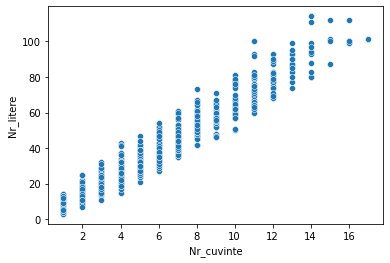

In [78]:
sns.scatterplot(x='Nr_cuvinte', y='Nr_litere', data=data2);

In [79]:
data2 = data2.drop('Nr_cuvinte', axis = 1).reset_index(drop=True)
data2 = data2.drop('Polaritate', axis = 1).reset_index(drop=True)
data2 = data2.drop('Lungime_medie_cuvant', axis = 1).reset_index(drop=True)
data2

,Mesaj,Scor,Nr_litere
0,way plug us unless converter,0,28
1,good case excellent value,1,25
2,great jawbone,1,13
3,tied charger conversations lasting 45 minutesm...,0,59
4,mic great,1,9
...,...,...,...
995,screen smudged easily touches ear face,0,38
996,piece junk lose calls phone,0,27
997,item match picture,0,18
998,thing disappoint infra red port ida,0,35


#### Bag Of Words(BOW)

Impartirea in set de antrenare si testare:
    

In [80]:
X_data:pd.core.frame.DataFrame = data.drop(columns = ['IsSpam'])
y_data:pd.core.frame.DataFrame = data['IsSpam']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=10)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train

,Clasa,Mesaj,Nr_litere
0,spam,500 new mobiles 2004 must text nakia 89545 col...,105
1,ham,mug you before leave house,26
2,ham,lets bill millers,17
3,ham,want hear anything,18
4,ham,file bagi work called mei tell find anything room,49
...,...,...,...
3728,ham,day class class,15
3729,ham,time thinkin goin,17
3730,ham,crazy ar hes married i like go looking guys fr...,116
3731,ham,finally came fix ceiling,24


In [81]:
X2_data:pd.core.frame.DataFrame = data2.drop(columns = ['Scor'])
y2_data:pd.core.frame.DataFrame = data2['Scor']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_data, y2_data, test_size=0.33, random_state=10)

X2_train.reset_index(drop=True, inplace=True)
X2_test.reset_index(drop=True, inplace=True)
y2_train.reset_index(drop=True, inplace=True)
y2_test.reset_index(drop=True, inplace=True)

X2_train

,Mesaj,Nr_litere
0,work weeks break,16
1,phone thorn side really abhor,29
2,comfortable fit need headset comfortable least...,67
3,definitely bargain,18
4,engage still lacking earbuds,28
...,...,...
665,also happy price,16
666,noise shield incredible,23
667,piece junk lose calls phone,27
668,great audio,11


Crearea vocabularului:

In [82]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit(X_train['Mesaj'])
len(matrix.vocabulary_)

6666

In [83]:
vectorizer2 = CountVectorizer()
matrix2 = vectorizer2.fit(X2_train['Mesaj'])
len(matrix2.vocabulary_)

1328

Pentru a putea observa efectele vectorizarii am selectat un mesaj la intamplare inainte de a aplica aceasta metoda pe intregul set. Se poate vedea ca in mesajul selectat apar 5 cuvinte din vocabularul creat anterior. Metoda transform returneaza o matrice in care se retine numarul de aparitii al cuvintelor respective. Pentru a verifica si corectitudinea, am selectat un cuvant la intamplare, iar mai apoi am afisat mesajul pentru a vedea daca acesta il contine.

In [84]:
example = vectorizer.transform([X_train['Mesaj'][59]])
print(example)
print(example.shape)
print(vectorizer.get_feature_names()[499])
print(X_train['Mesaj'][59])

  (0, 759)	1
  (0, 1759)	1
  (0, 2623)	1
  (0, 3025)	1
  (0, 3249)	1
(1, 6666)
863
getting anywhere damn job hunting


In [86]:
example2 = vectorizer2.transform([X2_train['Mesaj'][59]])
print(example2)
print(example2.shape)
print(vectorizer2.get_feature_names()[488])
print(X2_train['Mesaj'][59])

  (0, 488)	1
  (0, 1228)	1
(1, 1328)
giving
unreliable giving


Aplicam vectorizarea pe tot setul de date, urmand sa cream si matricea One Hot Encoded.

In [87]:
train_count = vectorizer.transform(X_train['Mesaj'])
bow_matrix: pd.core.frame.DataFrame = pd.DataFrame(train_count.toarray(), columns=vectorizer.get_feature_names())
bow_matrix

,008704050406,0089my,0121,01223585334,020603,0207,02070836089,02085076972,020903,021,...,ystrdayice,yummy,yun,yup,zac,zealand,zed,zoe,zogtorius,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
train_count2 = vectorizer2.transform(X2_train['Mesaj'])
bow_matrix2: pd.core.frame.DataFrame = pd.DataFrame(train_count2.toarray(), columns=vectorizer2.get_feature_names())
bow_matrix2

,10,11,12,18,20,2000,2005,2160,23,325,...,wouldnt,wow,wrong,year,years,yearsgreat,yes,yet,youd,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dupa cum se vede, matricea contine valori de 0 sau 1, ceea ce ne spune daca un cuvant apare sau nu. Pentru a evita eventuale probleme in sistemul de weightning, vom folosi `TF-IDF`, adica `Term frequency-inverse document frequency`, care va calcula relevanta unui cuvant. 

Acest lucru se realizează prin înmulțirea a două valori: de câte ori apare un cuvânt într-un document și frecvența inversă a documentului pentru un set de documente.

Să presupunem că avem un set de documente text în limba engleză și dorim să le clasăm în funcție de documentul care este mai relevant pentru interogare, „the brown cow”. O modalitate simplă de a începe este eliminarea documentelor care nu conțin toate cele trei cuvinte „the”, „brown” și „cow”, dar acest lucru lasă încă multe documente. Pentru a le deosebi în continuare, am putea număra de câte ori apare fiecare termen în fiecare document; de câte ori apare un termen într-un document se numește frecvența acestuia.

Deoarece termenul „the” este atât de comun, termenul de frecvență va tinde să sublinieze incorect documentele care se întâmplă să folosească cuvântul „the” mai frecvent, fără a da suficientă greutate termenilor mai semnificativi „brown” și „cow”. Termenul „the” nu este un cuvânt cheie bun pentru a distinge documente și termeni relevanți și nerelevanți, spre deosebire de cuvintele mai puțin frecvente „brown” și „cow”. Prin urmare, este încorporat un factor de frecvență invers al documentului care diminuează greutatea termenilor care apar foarte frecvent în setul de documente și crește ponderea termenilor care apar rar.

Sa observam asta folosind mesajul ales anterior pentru vectorizare.(acum in loc de 1 avem valori ce indica importanta cuvantului respectiv)

In [89]:
tfTransformer = TfidfTransformer().fit(train_count)
tfidf_test = tfTransformer.transform(example)
print(tfidf_test)

train_tfidf = tfTransformer.transform(train_count)
train_tfidf: pd.DataFrame = pd.DataFrame(train_tfidf.toarray(), columns=bow_matrix.columns)
train_tfidf

  (0, 3249)	0.3692075556330876
  (0, 3025)	0.5312699812948503
  (0, 2623)	0.346310331205477
  (0, 1759)	0.45326382997031195
  (0, 759)	0.5060227690325869


,008704050406,0089my,0121,01223585334,020603,0207,02070836089,02085076972,020903,021,...,ystrdayice,yummy,yun,yup,zac,zealand,zed,zoe,zogtorius,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
tfTransformer2 = TfidfTransformer().fit(train_count2)
tfidf_test2 = tfTransformer2.transform(example2)
print(tfidf_test2)

train_tfidf2 = tfTransformer2.transform(train_count2)
train_tfidf2: pd.DataFrame = pd.DataFrame(train_tfidf2.toarray(), columns=bow_matrix2.columns)
train_tfidf2

  (0, 1228)	0.6682658191538277
  (0, 488)	0.7439225732229556


,10,11,12,18,20,2000,2005,2160,23,325,...,wouldnt,wow,wrong,year,years,yearsgreat,yes,yet,youd,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Unirea setului de date obtinut cu cel initial(facand diferentierea printr-un sufix):

In [91]:
clean_train: pd.DataFrame = X_train.join(train_tfidf, rsuffix='_c', how='left')
clean_train

,Clasa,Mesaj,Nr_litere,008704050406,0089my,0121,01223585334,020603,0207,02070836089,...,ystrdayice,yummy,yun,yup,zac,zealand,zed,zoe,zogtorius,〨ud
0,spam,500 new mobiles 2004 must text nakia 89545 col...,105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,mug you before leave house,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ham,lets bill millers,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,want hear anything,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,file bagi work called mei tell find anything room,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,ham,day class class,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3729,ham,time thinkin goin,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3730,ham,crazy ar hes married i like go looking guys fr...,116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3731,ham,finally came fix ceiling,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
clean_train2: pd.DataFrame = X2_train.join(train_tfidf2, rsuffix='_c', how='left')
clean_train2


,Mesaj,Nr_litere,10,11,12,18,20,2000,2005,2160,...,wouldnt,wow,wrong,year,years,yearsgreat,yes,yet,youd,zero
0,work weeks break,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,phone thorn side really abhor,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,comfortable fit need headset comfortable least...,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,definitely bargain,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,engage still lacking earbuds,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,also happy price,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,noise shield incredible,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,piece junk lose calls phone,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,great audio,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Vectorizare si TF-IDF pentru setul de testare:
    

In [93]:
test_count = vectorizer.transform(X_test['Mesaj'])
test_tfidf = tfTransformer.transform(test_count)
test_tfidf: pd.DataFrame = pd.DataFrame(test_tfidf.toarray(), columns = bow_matrix.columns)

clean_test: pd.DataFrame = X_test.join(test_tfidf, rsuffix='_c', how='left')
clean_test

,Clasa,Mesaj,Nr_litere,008704050406,0089my,0121,01223585334,020603,0207,02070836089,...,ystrdayice,yummy,yun,yup,zac,zealand,zed,zoe,zogtorius,〨ud
0,ham,wont move morphine,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,bombad newshype park plaza 700 studio takenonl...,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ham,derek done class,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,hey happy birthday,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,ill hand phone chat wit you,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,ham,nothing getting mugs dis name wit different nos,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1835,ham,worry easy ingredients,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1836,ham,got back dislikes bed,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1837,ham,say fantastic chance anything need bigger life...,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
test_count2 = vectorizer2.transform(X2_test['Mesaj'])
test_tfidf2 = tfTransformer2.transform(test_count2)
test_tfidf2: pd.DataFrame = pd.DataFrame(test_tfidf2.toarray(), columns = bow_matrix2.columns)

clean_test2: pd.DataFrame = X2_test.join(test_tfidf2, rsuffix='_c', how='left')
clean_test2

,Mesaj,Nr_litere,10,11,12,18,20,2000,2005,2160,...,wouldnt,wow,wrong,year,years,yearsgreat,yes,yet,youd,zero
0,disappointing thing speakerphone,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,reading specs alone makes say wow,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.479104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sucked stuff work phone,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,go chargers tips really great,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,best headset used,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,buy butit sucks,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326,love cable allows connect minisub device pa,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327,razor offeryou must,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328,several different minute calls experienced 5 d...,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modele

Crearea dataframe-ului utilizat pentru stocarea scorurilor:

In [95]:
names: List[str] = ['model', 'fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1']
scores_df:pd.core.frame.DataFrame = pd.DataFrame(columns = names)

scores_df.head()

,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1


In [96]:
scores_df2:pd.core.frame.DataFrame = pd.DataFrame(columns = names)

scores_df2.head()

,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1


Renuntarea la coloanele de tip text:

In [98]:
def add_row(index: int, scores: List,scores_df:pd.core.frame.DataFrame) -> None:
    """
    Custom function to add row in a data frame
    :param index: the index of the row I want to add
    :param scores: the list of thing I want to add in my data frame
    :param scores_df: the data frame I want to add a row into
    :returns: None
    """
    for i in range(len(names)):
        scores_df.loc[index, names[i]] = scores[i]
    scores_df.head()
    
clean_train = clean_train.drop(columns = ['Clasa', 'Mesaj'])
clean_train

clean_train2 = clean_train2.drop(columns = ['Mesaj'])
clean_train2

,Nr_litere,10,11,12,18,20,2000,2005,2160,23,...,wouldnt,wow,wrong,year,years,yearsgreat,yes,yet,youd,zero
0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### DecisionTreeClassifier

In [99]:
clf = DecisionTreeClassifier()
param_dict = {'max_depth':[5, 6, 7], 'max_features':[1, 2, 3, 4], 'min_samples_leaf':[1, 2, 3, 4], 'criterion':['gini', 'entropy']}
    
randomized_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train, y_train)
best_param = randomized_search.best_params_

clf_best = DecisionTreeClassifier(**best_param)

grid_scores = cross_validate(clf_best, clean_train, y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['DecisionTreeClassifier', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(0, scores,scores_df)
print("Best parameters using RandomizedSearchCV: ", best_param)

scores_df.head()

Best parameters using RandomizedSearchCV:  {'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 5, 'criterion': 'gini'}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.164662,0.0476843,0.8674,0.868001,0.0270732,0.0357134


In [100]:
clf = DecisionTreeClassifier()
param_dict = {'max_depth':[5, 6, 7], 'max_features':[1, 2, 3, 4], 'min_samples_leaf':[1, 2, 3, 4], 'criterion':['gini', 'entropy']}
    
randomized_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train2, y2_train)
best_param = randomized_search.best_params_

clf_best = DecisionTreeClassifier(**best_param)

grid_scores = cross_validate(clf_best, clean_train2, y2_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['DecisionTreeClassifier', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(0, scores,scores_df2)
print("Best parameters using RandomizedSearchCV: ", best_param)

scores_df2.head()

Best parameters using RandomizedSearchCV:  {'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 7, 'criterion': 'entropy'}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.0124345,0.00822358,0.502985,0.510448,0.417311,0.436355


### RandomForestClassifier

In [101]:
clf = RandomForestClassifier()
param_dict = {'n_estimators':[100, 150, 200], 'max_depth':[5, 6, 7], 'max_features':[1, 2, 3, 4], 'min_samples_leaf':[1, 2, 3, 4], 'criterion':['gini', 'entropy']}
    
randomized_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train, y_train)
best_param = randomized_search.best_params_

clf_best = RandomForestClassifier(**best_param)

grid_scores = cross_validate(clf_best, clean_train, y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['RandomForestClassifier', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(1, scores,scores_df)
print("Best parameters using RandomizedSearchCV: ", best_param)

scores_df.head()

Best parameters using RandomizedSearchCV:  {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 7, 'criterion': 'gini'}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.164662,0.0476843,0.8674,0.868001,0.0270732,0.0357134
1,RandomForestClassifier,0.26128,0.0541957,0.865524,0.865524,0,0


In [102]:
clf = RandomForestClassifier()
param_dict = {'n_estimators':[100, 150, 200], 'max_depth':[5, 6, 7], 'max_features':[1, 2, 3, 4], 'min_samples_leaf':[1, 2, 3, 4], 'criterion':['gini', 'entropy']}
    
randomized_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train2, y2_train)
best_param = randomized_search.best_params_

clf_best = RandomForestClassifier(**best_param)

grid_scores = cross_validate(clf_best, clean_train2, y2_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['RandomForestClassifier', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(1, scores,scores_df2)
print("Best parameters using RandomizedSearchCV: ", best_param)

scores_df2.head()

Best parameters using RandomizedSearchCV:  {'n_estimators': 150, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 6, 'criterion': 'entropy'}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.0124345,0.00822358,0.502985,0.510448,0.417311,0.436355
1,RandomForestClassifier,0.157395,0.0172548,0.707463,0.915672,0.749158,0.922458


### KNN Classifier

In [103]:
clf = KNeighborsClassifier()
param_dict = {'n_neighbors':[3, 5, 10], 'weights':['uniform', 'distance'], 'leaf_size':[30, 40, 50]}
    
randomized_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train, y_train)
best_param = randomized_search.best_params_

clf_best = KNeighborsClassifier(**best_param)

grid_scores = cross_validate(clf_best, clean_train, y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['KNeighborsClassifier', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(2, scores,scores_df)
print("Best parameters using RandomizedSearchCV: ", best_param)

scores_df.head()

Best parameters using RandomizedSearchCV:  {'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 40}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.164662,0.0476843,0.8674,0.868001,0.0270732,0.0357134
1,RandomForestClassifier,0.26128,0.0541957,0.865524,0.865524,0,0
2,KNeighborsClassifier,3.61026,1.08571,0.934638,1,0.757896,1


In [104]:
clf = KNeighborsClassifier()
param_dict = {'n_neighbors':[3, 5, 10], 'weights':['uniform', 'distance'], 'leaf_size':[30, 40, 50]}
    
randomized_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train2, y2_train)
best_param = randomized_search.best_params_

clf_best = KNeighborsClassifier(**best_param)

grid_scores = cross_validate(clf_best, clean_train2, y2_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['KNeighborsClassifier', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(2, scores,scores_df2)
print("Best parameters using RandomizedSearchCV: ", best_param)

scores_df2.head()

Best parameters using RandomizedSearchCV:  {'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 50}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.0124345,0.00822358,0.502985,0.510448,0.417311,0.436355
1,RandomForestClassifier,0.157395,0.0172548,0.707463,0.915672,0.749158,0.922458
2,KNeighborsClassifier,0.073389,0.0301517,0.528358,0.997388,0.55502,0.997397


### SVC

In [105]:
clf = GaussianNB()
param_dict = {'var_smoothing': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]}
    
randomized_search = GridSearchCV(estimator=clf, param_grid=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train, y_train)
best_param = randomized_search.best_params_

clf_best = GaussianNB(**best_param)

grid_scores = cross_validate(clf_best, clean_train, y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['GaussianNB', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(3, scores,scores_df)
print("Best parameters using GridSearchCV: ", best_param)

scores_df.head()

Best parameters using GridSearchCV:  {'var_smoothing': 1e-05}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.164662,0.0476843,0.8674,0.868001,0.0270732,0.0357134
1,RandomForestClassifier,0.26128,0.0541957,0.865524,0.865524,0,0
2,KNeighborsClassifier,3.61026,1.08571,0.934638,1,0.757896,1
3,GaussianNB,0.553819,0.106644,0.966783,0.975087,0.873555,0.906432


In [106]:
clf = GaussianNB()
param_dict = {'var_smoothing': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]}
    
randomized_search = GridSearchCV(estimator=clf, param_grid=param_dict, cv=5, scoring='accuracy')
randomized_search.fit(clean_train2, y2_train)
best_param = randomized_search.best_params_

clf_best = GaussianNB(**best_param)

grid_scores = cross_validate(clf_best, clean_train2, y2_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

scores = ['GaussianNB', grid_scores['fit_time'].mean(), grid_scores['score_time'].mean(), grid_scores['test_accuracy'].mean(),
         grid_scores['train_accuracy'].mean(), grid_scores['test_f1'].mean(), grid_scores['train_f1'].mean()]

add_row(3, scores,scores_df2)
print("Best parameters using GridSearchCV: ", best_param)

scores_df2.head()

Best parameters using GridSearchCV:  {'var_smoothing': 1e-06}


,model,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,DecisionTreeClassifier,0.0124345,0.00822358,0.502985,0.510448,0.417311,0.436355
1,RandomForestClassifier,0.157395,0.0172548,0.707463,0.915672,0.749158,0.922458
2,KNeighborsClassifier,0.073389,0.0301517,0.528358,0.997388,0.55502,0.997397
3,GaussianNB,0.0224802,0.0105267,0.738806,0.990672,0.763724,0.990795


Importarea rezultatelor intr-un fisier html:

In [107]:
html: str = scores_df.to_html()
file = open("html_files/SMS.html", "w")
file.write(html)
file.close()

In [108]:
html: str = scores_df2.to_html()
file = open("html_files/Review.html", "w")
file.write(html)
file.close()